## Hi,

### The top 10 Selected apps from the BASIC EDA are:

1. My Talking Tom  
2. Score! Hero (I play this game!😛)  
3. Cooking Fever  
4. Where's My Water?  
5. Gmail  
6. Five Nights at Freddy's  
7. Messenger – Text and Video Chat for Free  
8. Subway Surfers  
9. PUBG MOBILE  
10. PayPal  

### Extra Apps to look for/suggestion:  

1. Ludo Family Dice Game  
2. Amazon Shopping  
3. GooglePay  

In [61]:
import numpy as np
import pandas as pd
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt
from PIL import Image

In [62]:
reviews_data = pd.read_csv('googleplaystore_user_reviews.csv')
reviews_data.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


Basic Statistics EDA

In [63]:
print('Shape of summary data:', reviews_data.shape)
print('--------------------------------------------')
print('Columns in our summary of data: ',reviews_data.columns)
print('--------------------------------------------')
print(reviews_data.info())
print('--------------------------------------------')
print('Total Unique APPS in the data: ',reviews_data.App.nunique())
print('--------------------------------------------')

Shape of summary data: (64295, 5)
--------------------------------------------
Columns in our summary of data:  Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')
--------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
App                       64295 non-null object
Translated_Review         37427 non-null object
Sentiment                 37432 non-null object
Sentiment_Polarity        37432 non-null float64
Sentiment_Subjectivity    37432 non-null float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB
None
--------------------------------------------
Total Unique APPS in the data:  1074
--------------------------------------------


In [64]:
# drop NAN

reviews_data = reviews_data.dropna(axis='rows')
reviews_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37427 entries, 0 to 64230
Data columns (total 5 columns):
App                       37427 non-null object
Translated_Review         37427 non-null object
Sentiment                 37427 non-null object
Sentiment_Polarity        37427 non-null float64
Sentiment_Subjectivity    37427 non-null float64
dtypes: float64(2), object(3)
memory usage: 1.7+ MB


In [65]:
list_of_extra_apps = ['Ludo Family Dice Game','Amazon Shopping','GooglePay']
# Let's check if the value exists or not?
for i in list_of_extra_apps:
    if i in reviews_data.App.get_values():
        print(i,': Present')
        print('----------')
    else:
        print(i,': Not Present')
        print('----------')

Ludo Family Dice Game : Not Present
----------
Amazon Shopping : Present
----------
GooglePay : Not Present
----------


In [66]:
amazon_reviews = reviews_data[reviews_data.App == list_of_extra_apps[1]].reset_index(drop=True)

In [67]:
amazon_reviews.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Amazon Shopping,Terrible change way switch wishlists. When scr...,Negative,-0.166667,0.700000
1,Amazon Shopping,"Completely useless. They changed triple price,...",Negative,-0.300000,0.600000
2,Amazon Shopping,"Hey, Jeff Bezos, employees living cars feeling...",Positive,0.100000,0.657778
3,Amazon Shopping,"Good app, keeps supposed to. Error messages do...",Positive,0.875000,0.600000
4,Amazon Shopping,This actually looking dogs error messages unde...,Neutral,0.000000,0.100000


In [68]:
print('Shape of summary data:', amazon_reviews.shape)
print('--------------------------------------------')
print('Columns in our summary of data: ',amazon_reviews.columns)
print('--------------------------------------------')
print(amazon_reviews.info())
print('--------------------------------------------')
print('Total Unique APPS in the data: ',amazon_reviews.Sentiment.nunique())
print('--------------------------------------------')
print('Total Unique APPS in the data: ',amazon_reviews.Sentiment.value_counts())
print('--------------------------------------------')

Shape of summary data: (45, 5)
--------------------------------------------
Columns in our summary of data:  Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')
--------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 5 columns):
App                       45 non-null object
Translated_Review         45 non-null object
Sentiment                 45 non-null object
Sentiment_Polarity        45 non-null float64
Sentiment_Subjectivity    45 non-null float64
dtypes: float64(2), object(3)
memory usage: 1.8+ KB
None
--------------------------------------------
Total Unique APPS in the data:  3
--------------------------------------------
Total Unique APPS in the data:  Positive    22
Negative    13
Neutral     10
Name: Sentiment, dtype: int64
--------------------------------------------


Let's draw a PIE CHART to understand the ratio of percentage towards the **Sentiment** for the AMAZON SHOPPING APP.

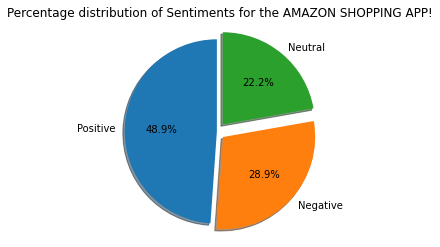

In [69]:
labels = ['Positive','Negative','Neutral']
installs = [amazon_reviews.Sentiment.value_counts()[0],amazon_reviews.Sentiment.value_counts()[1],amazon_reviews.Sentiment.value_counts()[2]]
explode = (0,0.09,0.1)
fig1,ax1 = plt.subplots()
ax1.pie(installs,explode = explode,labels = labels,autopct = '%1.1f%%',shadow = True,startangle = 90)
ax1.axis('equal')
plt.title('Percentage distribution of Sentiments for the AMAZON SHOPPING APP!')
plt.show()

In [86]:
def create_wordcloud(df):
    comment_words = '' 
    stopwords = set(STOPWORDS) 

    # iterate through the csv file 
    for val in df.Translated_Review: 

        # typecaste each val to string 
        val = str(val) 

        # split the value 
        tokens = val.split() 

        # Converts each token into lowercase 
        for i in range(len(tokens)): 
            tokens[i] = tokens[i].lower() 

        comment_words += " ".join(tokens)+" "

    wordcloud = WordCloud(width = 1000, height = 800, 
                    background_color ='white', 
                    stopwords = stopwords, 
                    min_font_size = 5).generate(comment_words) 

    # plot the WordCloud image                        
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud,interpolation='bilinear') 
    plt.axis("off") 
    plt.tight_layout(pad = 5) 

    plt.show()

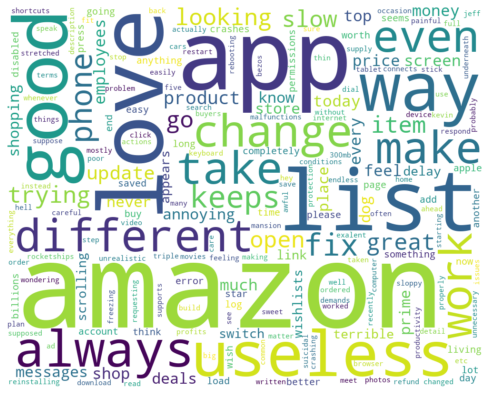

In [87]:
create_wordcloud(amazon_reviews)

SO, the resulting words for **AMAZON SHOPPING** app are:  
1. Amazon  
2. Good  
3. Phone  
4. Love  
5. App  
6. Make  
7. Different  
8. great  
9. always  
10. Useless  


We have downloaded a PAPER BAG image from Net and would like to put our WORDCLOUD in it.

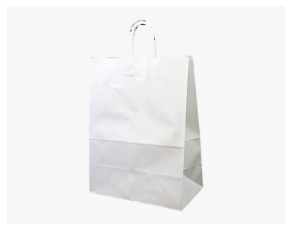

In [90]:
paper_bag_mask = np.array(Image.open("E:/UpGrad_Data Science/Offile ML Projects/Blogs@Medium/Google Play Store/paper-bag-packaging-white-paper-bags.png"))
plt.axis("off");
plt.imshow(paper_bag_mask );

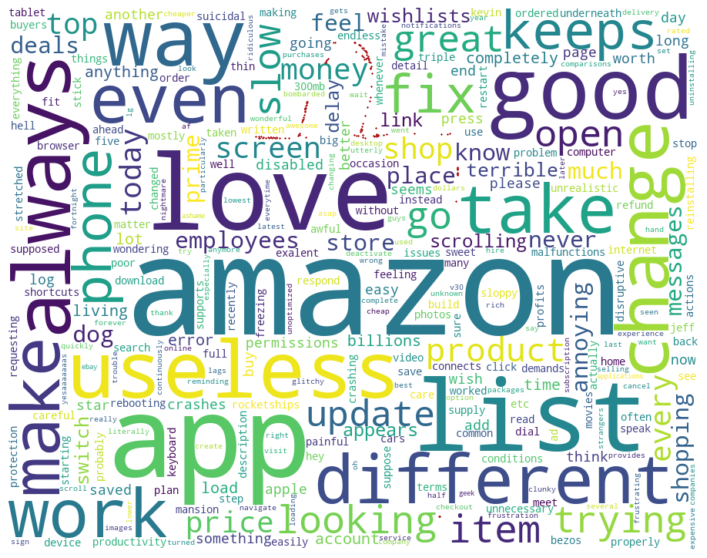

In [91]:
# Create a word cloud image
wc = WordCloud(background_color="white", max_words=1000, mask=paper_bag_mask,
               stopwords=stopwords, contour_width=3, contour_color='firebrick')

# Generate a wordcloud
wc.generate(comment_words)

# show
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

We can see that the red dotted lines, do actually represent that the **WordCloud** is formed on an impression of the **masked Bag**, although it's not very neat.